In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.preprocessing import LabelEncoder

In [3]:
data = 'https://github.com/iMnuelll/Bangkit_Capstone/raw/main/Data%20Dummy/new_data_dummy.csv'
df = pd.read_csv(data)

In [4]:
df.head(150)

,name,gender,age,job,task,work_days,difficulty,average_work_hour,average_rest,mood_before_work,...,Gangguan dari internal,Gangguan dari kesehatan,Gangguan dari lingkungan sekitar,Gangguan dari perangkat elektronik,Gangguan dari teman atau rekan kerja,Gangguan internet,Mood,Panggilan Telepon,Tidak ada,ajakan bermain
0,Matthew Castillo,0,34,4,2,1,1,6.8,3.5,2,...,1,1,0,1,0,1,1,1,0,1
1,Brooke Hull,1,36,0,3,6,4,3.9,3.3,2,...,1,0,1,0,1,1,1,0,0,1
2,Grant Tran,0,38,1,5,3,3,10.9,3.1,2,...,1,1,1,1,1,1,1,0,0,0
3,Rebecca Nguyen,1,27,0,6,3,3,1.9,3.5,0,...,1,0,1,1,0,1,1,0,1,0
4,Melissa Jennings,0,37,5,6,3,3,9.6,1.8,1,...,0,1,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sherry Smith,1,31,5,5,5,5,12.0,2.7,2,...,0,1,0,1,1,0,1,0,0,1
96,Justin Ortega,1,25,0,2,2,4,4.7,3.6,0,...,0,0,0,0,1,1,0,1,0,1
97,Bryan Miles,0,28,4,1,1,3,9.7,2.9,0,...,0,1,1,1,0,0,1,0,1,1
98,Karen Kim,1,31,5,2,5,2,6.9,3.1,1,...,1,1,1,0,0,1,1,1,1,0


In [5]:
df = df.drop(columns=['name'])

**Fungsi Visualisasi Data**

In [6]:
def scatterPlot(columnName, describe='mean'):
    mean_value = columnName.mean()
    median_value = columnName.median()

    plt.figure(figsize=(10, 5))
    plt.scatter(df.index, columnName)
    if describe == 'mean' :
      plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:.2f})')
    elif describe == 'median' :
      plt.axhline(median_value, color='red', linestyle='--', label=f'Median ({median_value:.2f})')
    plt.title(f'Scatter Plot of {columnName.name}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

**Visualisasi Kolom :**
1. average_work_hour
2. average_rest
3. work_days

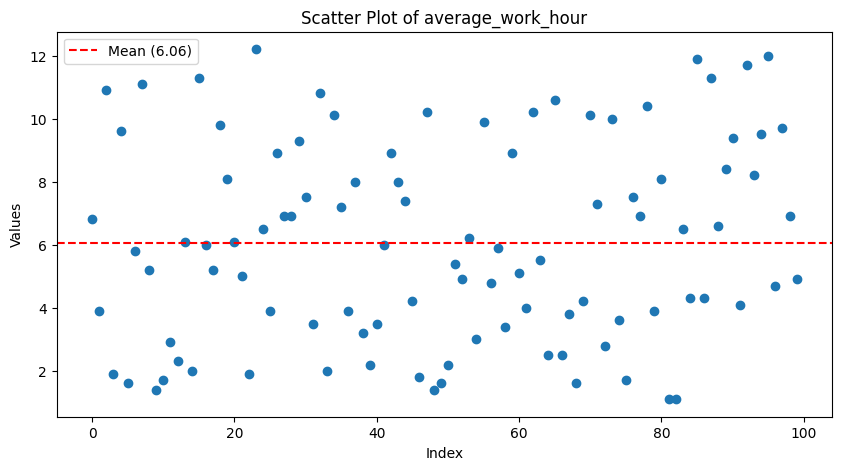

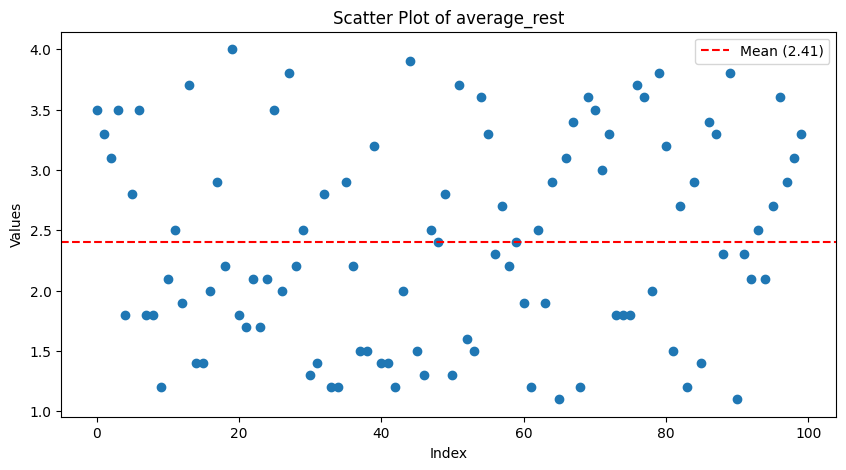

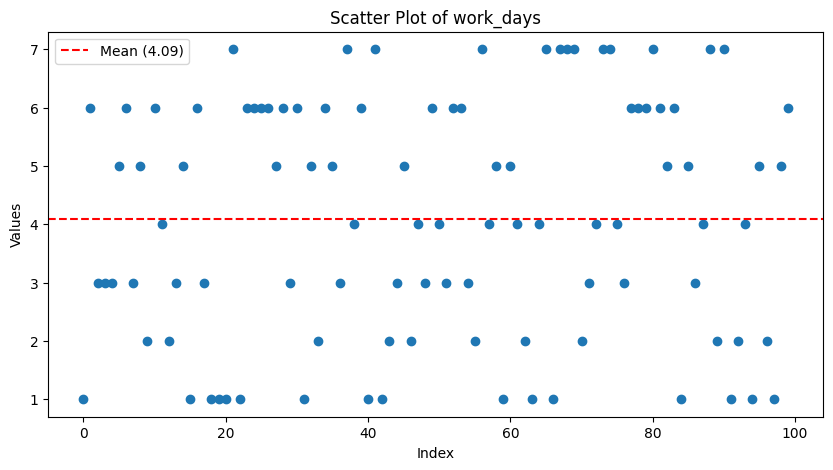

In [7]:
scatterPlot(df['average_work_hour'])
scatterPlot(df['average_rest'])
scatterPlot(df['work_days'])

**Menjumlahkan Total Gangguan**

In [8]:
df.columns

Index(['gender', 'age', 'job', 'task', 'work_days', 'difficulty',
       'average_work_hour', 'average_rest', 'mood_before_work',
       'mood_after_work', 'deadline', 'importance', 'sleep_average',
       'productive_time', 'urgency', 'Gangguan dari atasan',
       'Gangguan dari internal ', 'Gangguan dari kesehatan',
       'Gangguan dari lingkungan sekitar ',
       'Gangguan dari perangkat elektronik ',
       'Gangguan dari teman atau rekan kerja', 'Gangguan internet', 'Mood ',
       'Panggilan Telepon', 'Tidak ada', 'ajakan bermain'],
      dtype='object')

In [9]:
df['total_gangguan'] = df[['Gangguan dari atasan',
       'Gangguan dari internal ', 'Gangguan dari kesehatan',
       'Gangguan dari lingkungan sekitar ',
       'Gangguan dari perangkat elektronik ',
       'Gangguan dari teman atau rekan kerja', 'Gangguan internet', 'Mood ',
       'Panggilan Telepon', 'Tidak ada', 'ajakan bermain']].sum(axis=1)

In [10]:
df['total_gangguan'].describe()

count    100.00000
mean       5.52000
std        1.61733
min        2.00000
25%        5.00000
50%        6.00000
75%        7.00000
max       10.00000
Name: total_gangguan, dtype: float64

**Kategorisasi Hari Kerja**

In [11]:
df['work_days'].describe()

count    100.000000
mean       4.090000
std        2.050351
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: work_days, dtype: float64

In [12]:
def categorize_days(day):
    if 1 <= day <= 3:
        return "1 - 3 hari"
    elif day == 4:
        return "2 - 4 hari"
    elif day == 5:
        return "3 - 5 hari"
    elif day == 6:
        return "4 - 6 hari"
    elif day == 7:
        return "5 - 7 hari"
    else:
        return "Unknown category"

df['work_days_category'] = [categorize_days(day) for day in df['work_days']]
df['work_days_category_int'] = df['work_days_category'].str.extract(r'(\d+)\s*hari$')
df['work_days_category_int'] = df['work_days_category_int'].astype(int)

In [13]:
df['work_days_category_int'].describe()

count    100.000000
mean       4.520000
std        1.520765
min        3.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: work_days_category_int, dtype: float64

**Kalikan hari kerja dengan rata - rata jam kerja**

In [14]:
df['work_hour_in_week'] = df['work_days_category_int'] * df['average_work_hour']

In [15]:
df['work_hour_in_week'].describe()

count    100.000000
mean      27.226000
std       17.146909
min        4.200000
25%       12.675000
50%       25.350000
75%       35.025000
max       74.200000
Name: work_hour_in_week, dtype: float64

## **Kategori jam kerja dalam 1 minggu :**

1.   Paruh Waktu < 35 jam
2.   Normal 35 <= 40 jam
3.   Lembur > 40 jam



In [16]:
def work_hour_in_week(hours):

    if hours < 35 :
      return "Paruh Waktu"
    elif 35 <= hours <= 40 :
      return "Normal"
    elif hours > 40 :
      return "Lembur"

df['categorize_work_hour_in_week'] = df['work_hour_in_week'].apply(work_hour_in_week)

In [17]:
df['categorize_work_hour_in_week'].head(100)

0     Paruh Waktu
1     Paruh Waktu
2     Paruh Waktu
3     Paruh Waktu
4     Paruh Waktu
         ...     
95         Lembur
96    Paruh Waktu
97    Paruh Waktu
98    Paruh Waktu
99    Paruh Waktu
Name: categorize_work_hour_in_week, Length: 100, dtype: object

## **Encode :**
1. work_days_category
2. categorize_work_hour_in_week

In [18]:
label_encoder = LabelEncoder()

df['work_hour_label'] = label_encoder.fit_transform(df['categorize_work_hour_in_week'])
df['work_days_label'] = label_encoder.fit_transform(df['work_days_category'])

**Drop Column**

In [19]:
df.columns

Index(['gender', 'age', 'job', 'task', 'work_days', 'difficulty',
       'average_work_hour', 'average_rest', 'mood_before_work',
       'mood_after_work', 'deadline', 'importance', 'sleep_average',
       'productive_time', 'urgency', 'Gangguan dari atasan',
       'Gangguan dari internal ', 'Gangguan dari kesehatan',
       'Gangguan dari lingkungan sekitar ',
       'Gangguan dari perangkat elektronik ',
       'Gangguan dari teman atau rekan kerja', 'Gangguan internet', 'Mood ',
       'Panggilan Telepon', 'Tidak ada', 'ajakan bermain', 'total_gangguan',
       'work_days_category', 'work_days_category_int', 'work_hour_in_week',
       'categorize_work_hour_in_week', 'work_hour_label', 'work_days_label'],
      dtype='object')

In [20]:
df = df.drop(columns = ['work_days', 'average_work_hour', 'Gangguan dari atasan',
       'Gangguan dari internal ', 'Gangguan dari kesehatan',
       'Gangguan dari lingkungan sekitar ',
       'Gangguan dari perangkat elektronik ',
       'Gangguan dari teman atau rekan kerja', 'Gangguan internet', 'Mood ',
       'Panggilan Telepon', 'Tidak ada', 'ajakan bermain', 'work_days_category', 'work_days_category_int', 'work_hour_in_week',
       'categorize_work_hour_in_week', 'work_days_label'])

**Save To CSV**

In [21]:
# df.to_csv('fix_new_data_dummy.csv', sep='|', index=False)

In [22]:
df['productive_time'].value_counts()

productive_time
0    25
2    25
3    25
1    25
Name: count, dtype: int64

**Menggabungkan DataFrame**

In [34]:
data = 'https://github.com/iMnuelll/Bangkit_Capstone/raw/main/Preprocessing/data_gform_after_flatten.csv'
df2 = pd.read_csv(data, delimiter='|')

In [35]:
df2.head()

,gender,age,job,task,difficulty,average_rest,mood_before_work,mood_after_work,deadline,importance,sleep_average,productive_time,urgency,total_gangguan,work_hour_label
0,0,22,1,5,4,5.0,2,1,4,1,7.0,0,2,4,2
1,0,24,0,4,3,1.0,0,0,3,1,7.0,0,3,3,0
2,0,21,1,2,3,2.0,0,0,1,1,5.0,0,1,1,2
3,0,21,1,6,4,3.0,1,1,1,2,5.0,0,2,3,0
4,0,21,1,1,3,0.5,1,0,1,2,6.0,0,4,1,2


In [37]:
df_concate = pd.concat([df, df2], axis = 0)

In [38]:
df_concate.to_csv('concate_df.csv', sep='|', index=False)